# Basic Statistics and Data Exploration

Now that you have received an introduction to some of the most important data science libraries in Python, you will now use them to conduct simple statistical analysis and data exploration!

The concepts that we will go over are the following:

* Mean
* Median
* Range
* Correlation

The first three are basic statistical concepts that help you understand the shape / characteristics of the data. The last one, correlation, is a fundamental concept in data science that gives more information about the relationship of different columns. If you learned about correlation in school, great! This will teach you how to compute correlation using Python. If you don't know what correlation is, this notebook will provide a general introduction to it. If you want more in-depth knowledge of correlation, do take a look at [this video](https://www.youtube.com/watch?v=4EXNedimDMs).

This notebook will also show you some intermediate to advanced Pandas and Matplotlib techniques.

In [3]:
# Let's import our libraries again.
# In practice, you usually define the
# libraries you will use at the top of the script.

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Now let's load the duncan dataset again
duncan = pd.read_csv("duncan.csv")

# List the first 10 rows of data
duncan.head(10)

/Users/saito/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Unnamed: 0  type  income  education  prestige
0  accountant  prof      62         86        82
1       pilot  prof      72         76        83
2   architect  prof      75         92        90
3      author  prof      55         90        76
4     chemist  prof      64         86        90
5    minister  prof      21         84        87
6   professor  prof      64         93        93
7     dentist  prof      80        100        90
8    reporter    wc      67         87        52
9    engineer  prof      72         86        88

Let's try getting some basic statistical facts about this dataset. It's pretty easy to do:

In [21]:
print "======================" # just a divider
print "The statistics of the prestige column:"

# The mean() function get's the mean of a particular 
# column or DataFrame object
print "Mean: ", duncan["prestige"].mean()

# The median() function gets the median
print "Median: ", duncan["prestige"].median()

# There is no range() function for a DataFrame
# But the range of a set of data is defined as
# Largest number - smallest number
# We can easily get the these numbers using max()
# and min() respectively. Hence we can get
# the range as:
print "Range: ", duncan["prestige"].max() - duncan["prestige"].min()

The statistics of the prestige column:
Mean:  47.6888888889
Median:  41.0
Range:  94


In [22]:
# We can simplify this by writing a function
# Exercise
def get_summary(dataframe, column):
    print "======================" # just a divider
    print "The statistics of the", column, "column:"
    print "Mean: ", dataframe[column].mean()
    print "Median: ", dataframe[column].median()
    print "Range: ", dataframe[column].max() - dataframe[column].min()

get_summary(duncan, "income")
get_summary(duncan, "education")

The statistics of the income column:
Mean:  41.8666666667
Median:  42.0
Range:  74
The statistics of the education column:
Mean:  52.5555555556
Median:  45.0
Range:  93


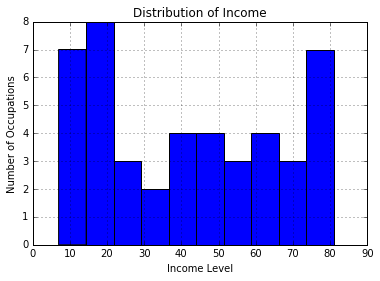

In [18]:
# Again we can look at the distribution of these columns
# by making a histogram

duncan["income"].hist()
plt.title("Distribution of Income")
plt.xlabel("Income Level")
plt.ylabel("Number of Occupations")

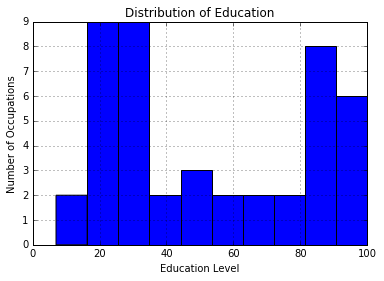

In [19]:
duncan["education"].hist()
plt.title("Distribution of Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Occupations")

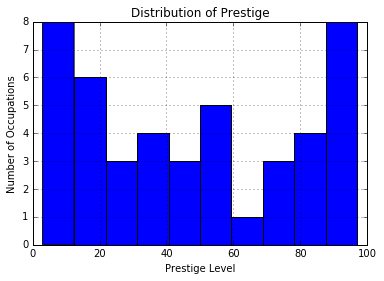

In [20]:
duncan["prestige"].hist()
plt.title("Distribution of Prestige")
plt.xlabel("Prestige Level")
plt.ylabel("Number of Occupations")

### So far we were able to get information about individual columns;

We were able to get information such as the mean, median, range, and the overall distribution of the all the datapoints.

### But data science is more than that. What we are interested in is the *relationship* between different sets or columns of data.

For example, if you are a restaurant owner, you might want to know the relationship between weather patterns and the number of customers you get. If you are a taxi driver, you would like to know how the time of day affects demand for taxis. Hence useful insights are often found when we look at different sets of data and find connections among them.

In statistics, one metric that describes the relationship between different sets of data is called **correlation**. This shows how one set of data affects the values of the other set. Height vs. Weight, for example, would have a *high* correlation because, the taller you are, the more likely that you are heavier. We call this a **positive correlation**. The highest positive correlation is 1.0.

And yes, there are such things as **negative correlations**. For example, Number of Hours Spent Procrastinating vs. Grades. The more time you spend procrastinating / playing, the lower your grades are likely to be (of course not for you geniuses). The lowest correlation is -1.0.

So let's try to find correlations in the Duncan dataset. Fortunately, there's a simple function for this.

In [76]:
# First of all, let's see how to fetch multiple
# columns from a DataFrame. Up until now, we have
# been getting individual columns. But in fact
# we can get multiple like this:

columns = ["income", "education"]
income_and_education = duncan[columns]
income_and_education.head()

income  education
0      62         86
1      72         76
2      75         92
3      55         90
4      64         86

In [26]:
# The .corr() function let's us find the correlation
# in a DataFrame. Let's try that
income_and_education.corr()

income  education
income     1.000000   0.724512
education  0.724512   1.000000

## What do the numbers mean?

As you can see, one half is just a reflection of the other. The correlation between education and income is 0.724512. This is a relatively **high positive correlation**. Hence, the higher the education level, the higher the income of a profession would be.

As you can see, the correlation of income vs. income and education vs. education is 1.0. *Can you think of why?*

Anyways, let's see what a correlation of 0.724512 looks like.

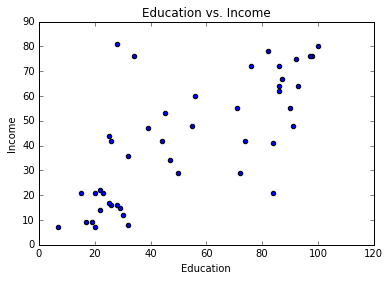

In [27]:
# Plot education on the x-axis and income
# on the y-axis

plt.scatter(duncan["education"], duncan["income"])
plt.title("Education vs. Income")
plt.xlabel("Education")
plt.ylabel("Income")

As you can see, there is an upward trend towards the right.

In [28]:
# Now we want to look at the correlation among all the variables.
# While we took two columns at a time in the above example,
# we can infact make a matrix of all the correlation scores.

duncan.corr()

income  education  prestige
income     1.000000   0.724512  0.837801
education  0.724512   1.000000  0.851916
prestige   0.837801   0.851916  1.000000

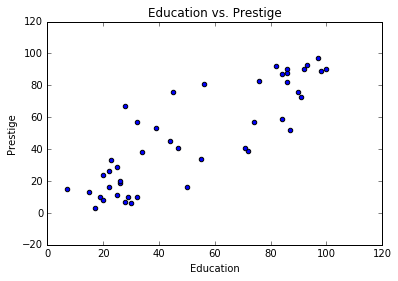

In [34]:
# Seems like education vs. prestige has the highest correlation.

plt.scatter(duncan["education"], duncan["prestige"])
plt.title("Education vs. Prestige")
plt.xlabel("Education")
plt.ylabel("Prestige")

Compared to the previous plot, this one seems to show a higher degree of positive correlation

In [42]:
# Let's do some further data exploration.
# We want to see how the education, income, prestige
# differ depending on the job type.

# We have three job types. We can show this with the
# following function - unique(list)
# Given a column, it will return a list of unique
# values.

# Hence let's get the job types
job_types = duncan["type"].unique()
print job_types

['prof' 'wc' 'bc']


In [4]:
# Now let's split the duncan dataset and group
# by job type. How can we do this?

# Fortunately, Pandas makes it very convenient for
# us to search DataFrames for rows with particular values
# For example:
which_are_professionals = duncan["type"] == "prof"
print which_are_professionals.head(10)
print "======================" # just a divider
# Compare with the original duncan data
print duncan["type"].head(10)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8    False
9     True
Name: type, dtype: bool
0    prof
1    prof
2    prof
3    prof
4    prof
5    prof
6    prof
7    prof
8      wc
9    prof
Name: type, dtype: object


### As you can see,

Those where *type* equals *prof* returns `True`. For other values, such as *wc* as seen in row 8, returns `False`.

But how does this help us? In fact, using the above list of `True` and `False`, we can actually select the rows we want from the DataFrame!

So if we index the original dataset with these new indices, we in fact get all the rows where `type == prof`! This is a very, very important and useful feature of DataFrames

In [5]:
# Get all the rows where type==prof
profs = duncan[which_are_professionals]

# Likewise, do it for wc and bc
wcs = duncan[duncan["type"] == "wc"]
bcs = duncan[duncan["type"] == "bc"]

# Make sure the numbers add up!
# Remember that we can get the number of rows
# using the shape variable
total_number_of_rows = duncan.shape[0]
print total_number_of_rows
print "======================" # just a divider
print profs.shape[0]
print wcs.shape[0]
print bcs.shape[0]

# They do add up!

45
18
6
21


In [6]:
# What do they look like?
profs.head()

Unnamed: 0  type  income  education  prestige
0  accountant  prof      62         86        82
1       pilot  prof      72         76        83
2   architect  prof      75         92        90
3      author  prof      55         90        76
4     chemist  prof      64         86        90

In [7]:
bcs.head()

Unnamed: 0 type  income  education  prestige
24       carpenter   bc      21         23        33
25     electrician   bc      47         39        53
26     RR.engineer   bc      81         28        67
27       machinist   bc      36         32        57
28  auto.repairman   bc      22         22        26

Now that we've been able to separate the data, let's go back to our original objective, that is, to look at how income, education, and prestige vary across the three dataframes

In [68]:
# Let's be smart and write a few functions to 
# get a summary of the datasets

columns = ["income", "education", "prestige"]

# This function gets the statistics of specified
# columns for a particular dataframe
def get_stats(dataframe, columns):
    for column in columns:
        # Let's use the get_summary() function we
        # created earlier
        get_summary(dataframe, column)

# For professional occupations
get_stats(profs, columns)

The statistics of the income column:
Mean:  60.0555555556
Median:  63.0
Range:  59
The statistics of the education column:
Mean:  81.3333333333
Median:  86.0
Range:  56
The statistics of the prestige column:
Mean:  80.4444444444
Median:  85.0
Range:  52


In [69]:
# White-collar occupations
get_stats(wcs, columns)

The statistics of the income column:
Mean:  50.6666666667
Median:  51.5
Range:  47
The statistics of the education column:
Mean:  61.5
Median:  63.0
Range:  53
The statistics of the prestige column:
Mean:  36.6666666667
Median:  38.5
Range:  36


In [70]:
# Blue-collar occupations
get_stats(bcs, columns)

The statistics of the income column:
Mean:  23.7619047619
Median:  17.0
Range:  74
The statistics of the education column:
Mean:  25.3333333333
Median:  25.0
Range:  40
The statistics of the prestige column:
Mean:  22.7619047619
Median:  16.0
Range:  64


# What do you see?

There is clearly a difference in income, education, and prestige across the three different dataframes. Professional careers have the highest, followed by white collar jobs, and finally with blue collars having the lowest levels of the three factors.

Let's try to visualize this. Here, we will learn how to plot multiple graphs

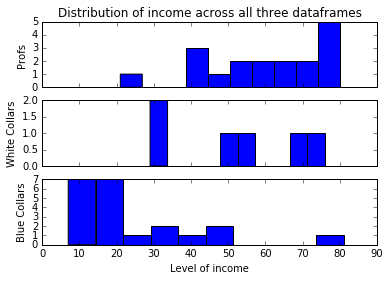

In [73]:
def plot_by_column(column):
    # This function allows us to create 3 plots on the same graph
    # You can ignore figure for now.
    figure, axes = plt.subplots(3, sharex=True)
    
    # axes is essentially a list. Since we requested
    # for 3 plots, there are 3 elements in axes
    
    # Make a histogram for Profs
    axes[0].hist(profs[column])
    axes[0].set_ylabel("Profs")
    
    # Make a histogram for White collars
    axes[1].hist(wcs[column])
    axes[1].set_ylabel("White Collars")
    
    # Make a histogram for Blue collars
    axes[2].hist(bcs[column])
    axes[2].set_ylabel("Blue Collars")
    
    # Set the title of the graph
    axes[0].set_title("Distribution of " + column + " across all three dataframes")
    # Set the x-axis label
    axes[2].set_xlabel("Level of " + column)

plot_by_column("income")

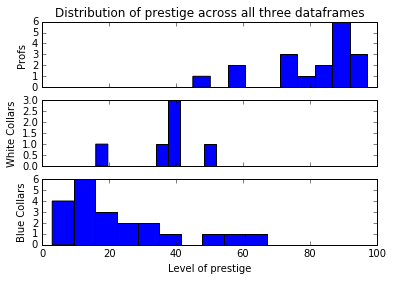

In [74]:
plot_by_column("prestige")

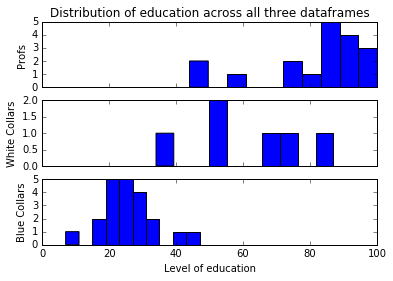

In [75]:
plot_by_column("education")

# The patterns are clearly visible.

Those who are in professional occupations have the **highest education levels**, **highest prestige**, and **highest income levels**. Those who have blue-collar jobs have the **lowest education levels**, **lowest prestige**, and thus the **lowest income levels**.

### Was that really obvious when we looked at the dataset?

We were able to bring this insight out by getting statistical data and visualizing patterns. That was not immediately available when we first started.

**This is one the most important functions of data science:** to make the invisible, visible. Sure, perhaps what we concluded on is common knowledge. We know that a dentist requires a higher educational background than a carpenter.

However, there's a lot of data out there where important insights and trends are hidden. Some of these insights can lead to the next big product, innovation, or social change. Data science is the key to unlock these secrets.

What we covered is but a small introduction to the field of data science. There are countless opportunities out there, and we hope this has made you curious.